<a href="https://colab.research.google.com/github/shiwangi20/Data-Visualization-using-Seaborn/blob/master/Visualizing_Linear_Relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Linear Relationships

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set(color_codes = True)

In [0]:
tips = sns.load_dataset('tips')

## Functions to draw Linear Regression Models

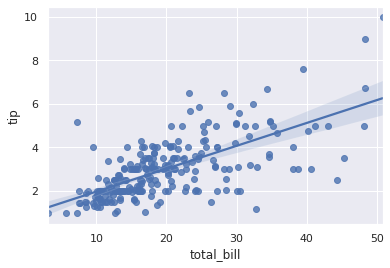

In [4]:
sns.regplot(x='total_bill',y='tip',data=tips)

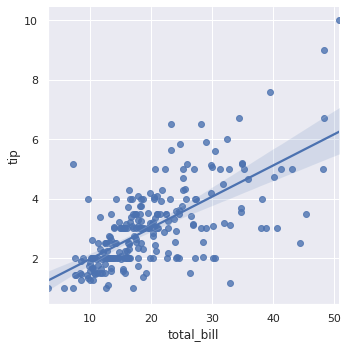

In [5]:
sns.lmplot(x='total_bill',y='tip',data=tips)

Difference between regplot and lmplot : regplot accepts x and y  variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings.

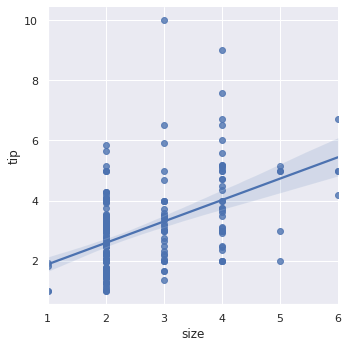

In [6]:
# fitting linear regression where variable takes discrete values
sns.lmplot(x='size',y='tip',data=tips)

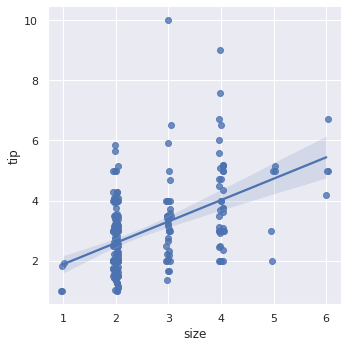

In [7]:
# jitter is applied to clearly view these values
sns.lmplot(x='size',y='tip',data=tips,x_jitter=0.05)

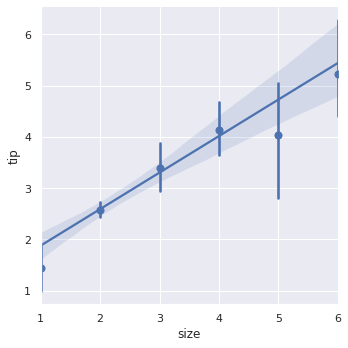

In [8]:
# plotting discrete values with central tendency
sns.lmplot(x='size',y='tip',data=tips,x_estimator=np.mean)

## Fitting Different Kinds of Models

In [9]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


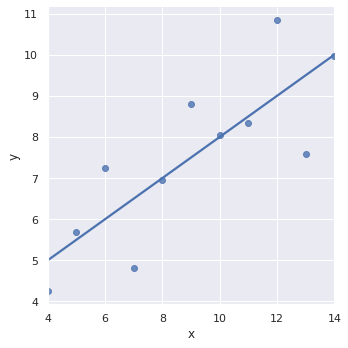

In [10]:
sns.lmplot(x='x',y='y',data=anscombe.query("dataset == 'I'"),ci=None)

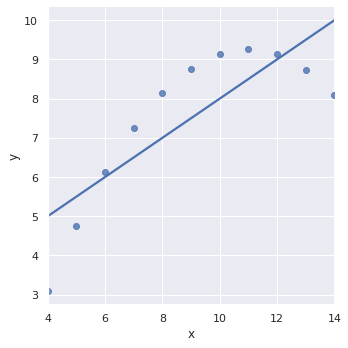

In [11]:
sns.lmplot(x='x',y='y',data=anscombe.query("dataset == 'II'"),ci = None)

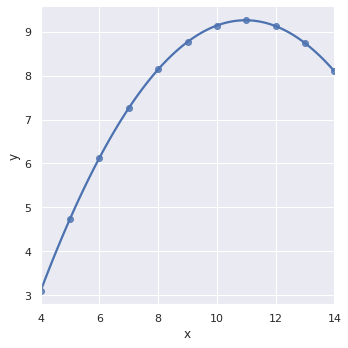

In [12]:
# to fit non linear relationships like above
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='II'"),ci=None,order=2)

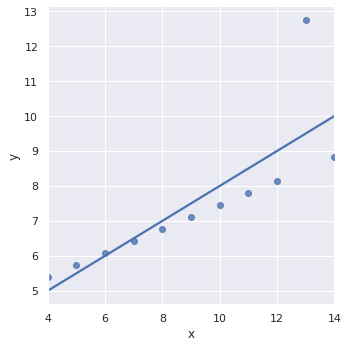

In [13]:
# problems with outliers
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='III'"),ci=None)

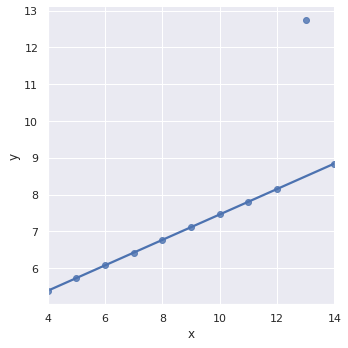

In [14]:
# to avoid the devaiation due to outliers, robust regression is used
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='III'"),ci=None,robust = True)

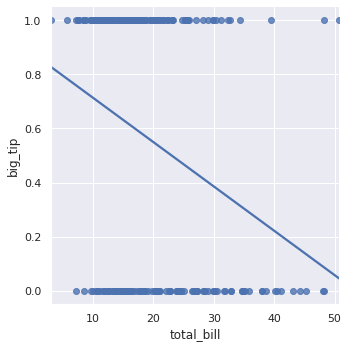

In [15]:
# when y is binary
tips['big_tip'] = (tips.tip / tips.total_bill) > 0.15
sns.lmplot(x='total_bill',y='big_tip',data=tips,ci = None)

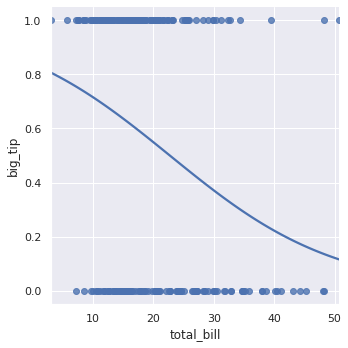

In [16]:
# to fit the binary data use logistic regression
sns.lmplot(x='total_bill',y='big_tip',data=tips,ci = None,logistic = True)

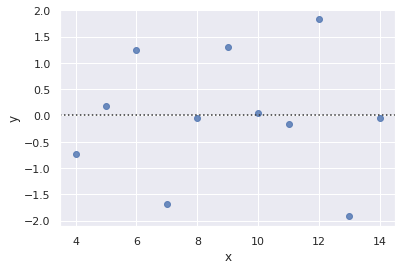

In [17]:
# to check if simple linear regression is suitable 
# ideally values should be scattered randomly
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"));

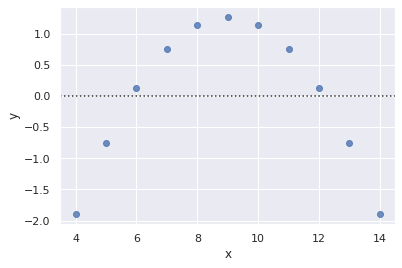

In [18]:
# if there is structure like this then simple linear regression is not suitable
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"));

## Conditioning on Other Variables

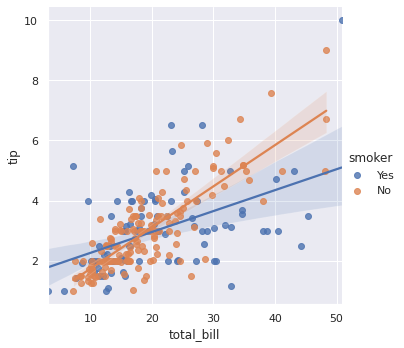

In [19]:
# While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression
# on “faceted” plots that allows to explore interactions with up to three additional categorical variables.
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker')

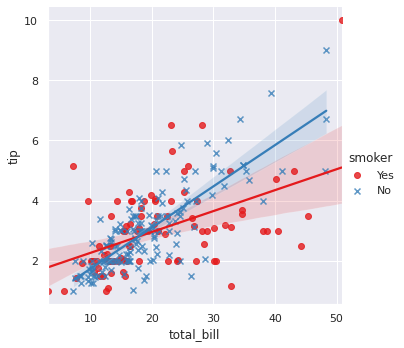

In [20]:
# add markers and change color
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker',markers=['o','x'],palette='Set1')

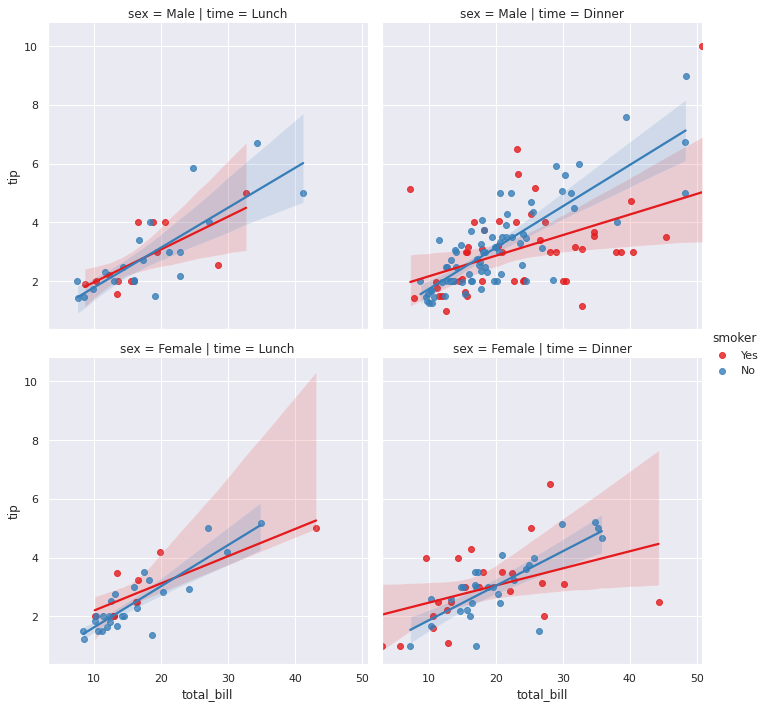

In [21]:
# multiple facets
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker',palette='Set1',col = 'time',row='sex')

## Controlling the Size and Shape of Plot

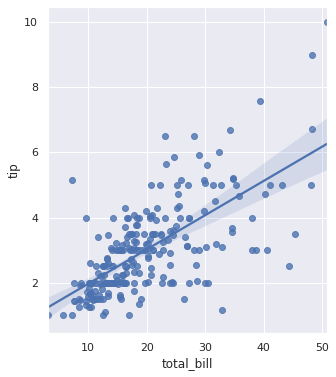

In [22]:
f,ax = plt.subplots(figsize=(5,6))
sns.regplot(x='total_bill',y='tip',data=tips,ax = ax)

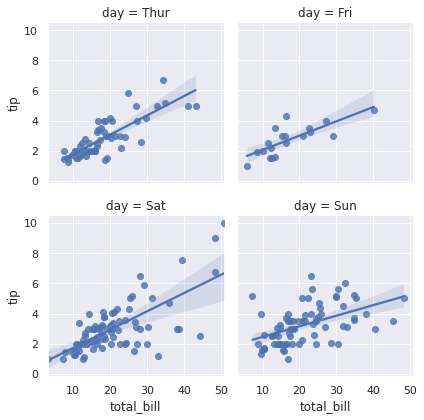

In [23]:
# using height and aspect
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,col_wrap=2, height=3);

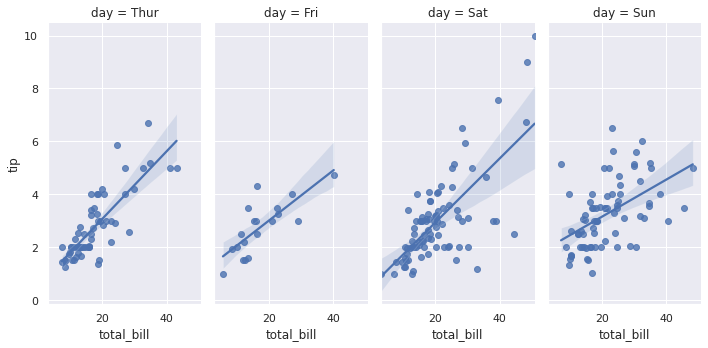

In [24]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,aspect=.5);

## Plotting a Regression in Other Context

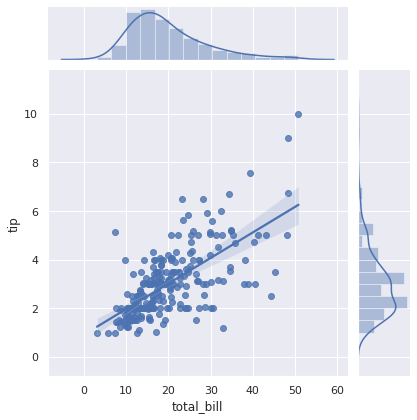

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'reg')

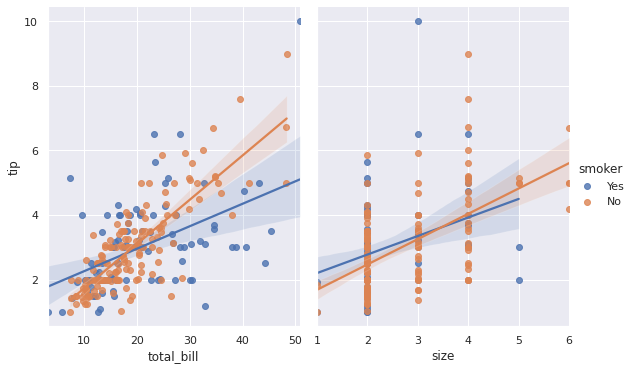

In [26]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg",hue='smoker');